Number adder

In [ ]:
# import libraries
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split

import numpy as np

import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [ ]:
# data set
combinations = []

In [ ]:
len(combinations)

0

In [ ]:
for i in range(-10, 11):
  for j in range(-10, 11):
    sum = i+j
    combination = [i,j,sum]
    combinations.append(combination)
combinations = np.array(combinations)

In [ ]:
dataT = torch.tensor( combinations[:,:2]).float()
sumT = torch.tensor( combinations[:,-1]).float()
sumT = sumT[:,None] # transform to matrix

In [ ]:
# use scikitlearn to split the data
train_dataSK,test_dataSK, train_labelsSK,test_labelsSK = train_test_split(dataT, sumT, test_size=.1)

# then convert them into PyTorch Datasets (note: already converted to tensors)
train_dataDataset = torch.utils.data.TensorDataset(train_dataSK,train_labelsSK)
test_dataDataset  = torch.utils.data.TensorDataset(test_dataSK,test_labelsSK)

# finally, translate into dataloader objects
batchsize    = 16
train_loader = DataLoader(train_dataDataset,batch_size=batchsize,shuffle=True,drop_last=True)
test_loader  = DataLoader(test_dataDataset,batch_size=test_dataDataset.tensors[0].shape[0])

In [ ]:
# create a class for the model

class ANNadder(nn.Module):
  def __init__(self):
    super().__init__()

    ### input layer
    self.input = nn.Linear(2,5)

    ### hidden layers
    self.fc1 = nn.Linear(5,5)
    self.fc2 = nn.Linear(5,5)

    ### output layer
    self.output = nn.Linear(5,1)

  # forward pass
  def forward(self,x):
    x = F.relu( self.input(x) )
    x = F.relu( self.fc1(x) )
    x = F.relu( self.fc2(x) )
    return self.output(x)

In [ ]:
# a function that trains the model

# global parameter
numepochs = 50

def trainTheModel():

  # loss function and optimizer
  lossfun = nn.MSELoss()
  optimizer = torch.optim.Adam(addernet.parameters(),lr=.01)

  # initialize losses
  trainLoss = torch.zeros(numepochs)
  testLoss  = torch.zeros(numepochs)
  trainAcc = np.zeros(numepochs)
  testAcc  = np.zeros(numepochs)

  # loop over epochs
  for epochi in range(numepochs):

    # switch on training mode
    addernet.train()

    # loop over training data batches
    batchLoss = []
    batchAcc = []
    for X,y in train_loader:

      # forward pass and loss
      yHat = addernet(X)
      loss = lossfun(yHat,y)

      # backprop
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      # loss from this batch
      batchLoss.append(loss.item())
      batchAcc.append(100*torch.mean( (np.abs(yHat.detach()-y)<1).float() )) # <1 for rounding
    # end of batch loop...

    # get average losses across the batches
    trainLoss[epochi] = np.mean(batchLoss)
    trainAcc[epochi] = np.mean(batchAcc)

    # test accuracy
    addernet.eval()
    X,y = next(iter(test_loader)) # extract X,y from test dataloader
    with torch.no_grad(): # deactivates autograd
      yHat = addernet(X)
    testLoss[epochi] = lossfun(yHat,y).item()
    testAcc[epochi] = 100*torch.mean( (np.abs(yHat-y)<1).float() )

  # function output
  return trainLoss,testLoss,trainAcc, testAcc

In [ ]:
# create a model and train it
addernet = ANNadder()
trainLoss,testLoss,trainAcc, testAcc = trainTheModel()

<ipython-input-126-134f63a26e8b>:40: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  batchAcc.append(100*torch.mean( (np.abs(yHat.detach()-y)<1).float() )) # <1 for rounding
<ipython-input-126-134f63a26e8b>:53: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  testAcc[epochi] = 100*torch.mean( (np.abs(yHat-y)<1).float() )


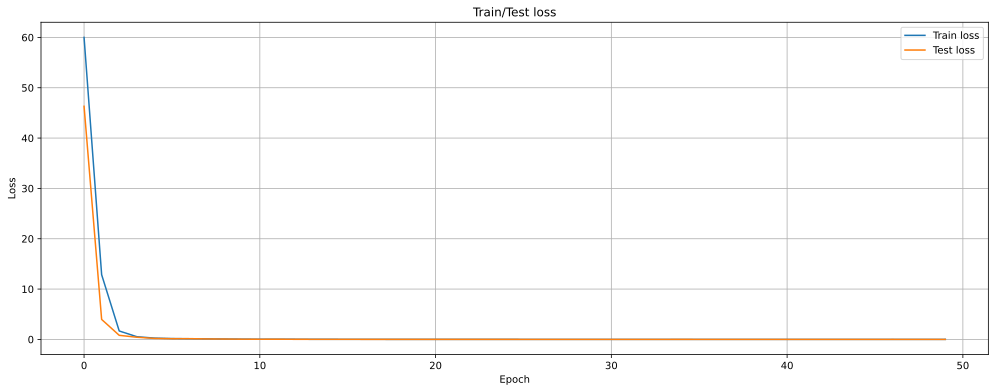

In [ ]:
# plot some results
fig,ax = plt.subplots(1,1,figsize=(17,6))

ax.plot(trainLoss,label='Train loss')
ax.plot(testLoss,label='Test loss')
ax.set_title('Train/Test loss')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.legend()
ax.grid()

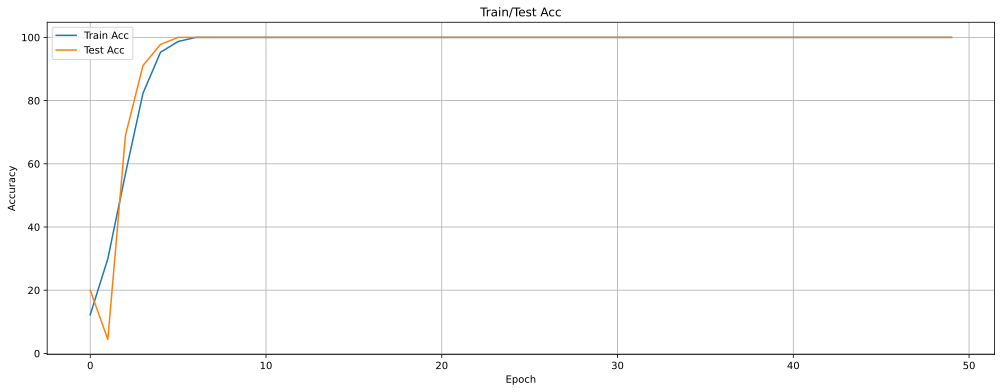

In [ ]:
# plot some results
fig,ax = plt.subplots(1,1,figsize=(17,6))

ax.plot(trainAcc,label='Train Acc')
ax.plot(testAcc,label='Test Acc')
ax.set_title('Train/Test Acc')
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')
ax.legend()
ax.grid()

In [ ]:
  ### now test with new data!
  # create brand new test data
TESTdata = torch.randint(low=-10,high=11,size=(2000,2)).float()
TESTlabels = torch.sum(TESTdata,axis=1,keepdim=True)

# evaluate the model and compute accuracy
with torch.no_grad():
    predictions = addernet(TESTdata)
testaccs = 100*torch.mean( (np.abs(predictions-TESTlabels)<1).float() )

<ipython-input-130-a9f40121d5db>:9: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  testaccs = 100*torch.mean( (np.abs(predictions-TESTlabels)<1).float() )


In [ ]:
testaccs

tensor(100.)

In [ ]:
for i in range(10):
# create a model and train it
  addernet = ANNadder()
  trainLoss,testLoss,trainAcc, testAcc = trainTheModel()
  TESTdata = torch.randint(low=-10,high=11,size=(2000,2)).float()
  TESTlabels = torch.sum(TESTdata,axis=1,keepdim=True)

  # evaluate the model and compute accuracy
  with torch.no_grad():
      predictions = addernet(TESTdata)
  testAccc = 100*torch.mean( (np.abs(predictions-TESTlabels)<1).float() )
  print(f"Train Acc is {trainAcc[-1]} and test Acc is {testAccc}")

<ipython-input-126-134f63a26e8b>:40: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  batchAcc.append(100*torch.mean( (np.abs(yHat.detach()-y)<1).float() )) # <1 for rounding
<ipython-input-126-134f63a26e8b>:53: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  testAcc[epochi] = 100*torch.mean( (np.abs(yHat-y)<1).float() )
<ipython-input-132-746e8fef90c6>:11: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  testAccc = 100*torch.mean( (np.abs(predictions-TESTlabels)<1).float() )


Train Acc is 100.0 and test Acc is 100.0
Train Acc is 100.0 and test Acc is 100.0
Train Acc is 100.0 and test Acc is 100.0
Train Acc is 100.0 and test Acc is 100.0
Train Acc is 100.0 and test Acc is 100.0
Train Acc is 99.47916412353516 and test Acc is 99.55000305175781
Train Acc is 100.0 and test Acc is 100.0
Train Acc is 100.0 and test Acc is 100.0
Train Acc is 100.0 and test Acc is 100.0
Train Acc is 100.0 and test Acc is 100.0


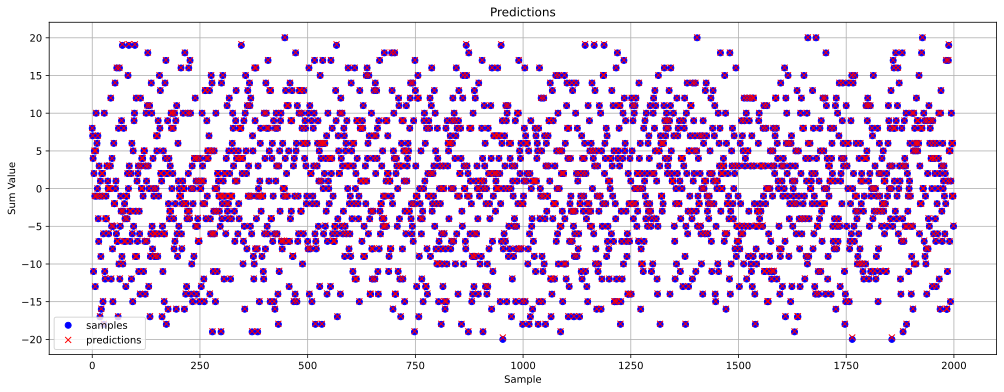

In [ ]:
# plot some results
fig,ax = plt.subplots(1,1,figsize=(17,6))

ax.plot(TESTlabels, marker='o', linestyle='', color='blue')
ax.plot(predictions, marker='x', linestyle='', color='red')
ax.set_title('Predictions')
ax.set_xlabel('Sample')
ax.set_ylabel('Sum Value')
ax.legend(['samples', 'predictions'])
ax.grid()